# Lab 2: Pandas, Data Management, Transformation and Simple Visualisation

## Learning goals

- Import data sets with Pandas
- How to transform variables and create new variables in Pandas.
- Understand the log transformation in statistics.
- Understand what normalizeing a variable is and why we do it.
- Creating summary statistics in Pandas.
- Creating simple visualisations with built-in pandas functions.

## Literature

PDS [Ch. 3](https://jakevdp.github.io/PythonDataScienceHandbook/03.00-introduction-to-pandas.html):
[Pandas Objects](https://jakevdp.github.io/PythonDataScienceHandbook/03.01-introducing-pandas-objects.html), 
[Indexing and selection](https://jakevdp.github.io/PythonDataScienceHandbook/03.02-data-indexing-and-selection.html)
[Operating on data](https://jakevdp.github.io/PythonDataScienceHandbook/03.03-operations-in-pandas.html), 
[Missing data](https://jakevdp.github.io/PythonDataScienceHandbook/03.04-missing-values.html)

# What is Pandas?

Numpy arrays provide a powerful and flexible way of handling and manipulating data. But it is not particularily user-friendly, at least compared to the built-in systems in R. In R, data management is built around an object called a **data frame** which gives you the ability to store data within R in the intuitive way you are used to from a spreadsheet: with column and row variables and where you can easily select a variable by name. 

R also provides simple tools for importing formatted data (did you have some frustrations trying to import data directly into a Numpy array in the assignment on lab 1?)

Pandas recreates the *data frame* object for Python, and some of the related tools for importing, cleaning, manipulating and summarizing data--all built on top of the powerful Numpy array. 

Once you have Pandas up and running, you have turned Python into a full-featured data management and analysis platform.

We start by importing the packages we wish to use

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

I again also want to set some plot settings to make them look better, don't worry too much about these settings, everything works fine without them. 

In [2]:
from cycler import cycler

plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams["axes.labelsize"]= 12
plt.rcParams["figure.facecolor"] = "#f2f2f2"
#plt.rcParams['figure.savefig.dpi'] = 100
plt.rcParams['savefig.edgecolor'] = "#f2f2f2"
plt.rcParams['savefig.facecolor'] ="#f2f2f2"
plt.rcParams["figure.figsize"] = [16,10]
plt.rcParams['savefig.bbox'] = "tight"
plt.rcParams['font.size'] = 14
greens = ['#66c2a4','#41ae76','#238b45','#006d2c','#00441b']
multi =['#66c2a4','#1f78b4','#a6cee3','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f']
plt.rcParams["axes.prop_cycle"] = cycler(color=multi)


To demonstrate the use of Pandas we will make use of a real-life, big, messy dataset: [The Penn World Tables](https://www.rug.nl/ggdc/productivity/pwt/?lang=en) or PWT for short.

A users guide can be found [here](https://www.rug.nl/ggdc/docs/pwt_80_user_guide.pdf)

A definition of the variables can be found [here](https://jmaurit.github.io/anv_statistikk/data/pwtDefs.xlsx)

PWT contains macroeconomic data on 183 countries from 1950 to 2019. 

This is a so called **panel data** - that follows many individuals (countries) over several time periods (years).  The name *Pandas* comes from *PANel DAta Sets*, so handling such data is literally what Pandas was made for. 



## Loading in data with Pandas

Let's load in our data, which I have saved a copy of on my website. For a csv file it is super easy:

In [3]:
pwt = pd.read_csv("http://jmaurit.github.io/anv_statistikk/data/pwt100.csv", sep=";", decimal=",")

In [4]:
pwt

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
0,ABW,Aruba,Aruban Guilder,1950,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,Aruban Guilder,1951,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,Aruban Guilder,1952,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,Aruban Guilder,1953,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,Aruban Guilder,1954,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12805,ZWE,Zimbabwe,US Dollar,2015,40141.61719,39798.64453,13.814629,6.393752,NaN,2.584653,...,0.140172,-0.287693,-0.051930,0.479228,0.651287,0.541446,0.616689,0.533235,0.422764,1.533909
12806,ZWE,Zimbabwe,US Dollar,2016,41875.20313,40963.19141,14.030331,6.504374,NaN,2.616257,...,0.131920,-0.251232,-0.016258,0.470640,0.651027,0.539631,0.619789,0.519718,0.416510,1.491724
12807,ZWE,Zimbabwe,US Dollar,2017,44672.17578,44316.74219,14.236595,6.611773,NaN,2.648248,...,0.126722,-0.202827,-0.039897,0.473560,0.639560,0.519956,0.619739,0.552042,0.415592,1.514525
12808,ZWE,Zimbabwe,US Dollar,2018,44325.10938,43420.89844,14.438802,6.714952,NaN,2.680630,...,0.144485,-0.263658,-0.020791,0.543757,0.655473,0.529867,0.641361,0.561526,0.425143,1.590120


csv stands for *comma seperated file*, that is, the data columns are typically separated by comma. 

Except in this file the data is seperated by a semicolon (you can easily check by viewing your data file in a text editor like textEdit on a mac). So I needed to specify that the seperator is a ; by writing **sep=";"**

Another common issue working with Norwegian or European data is that a "," is used for the decimal place (3,4 instead of 3.4 as in the US/UK). Therefor we specify **decimal=","**. 


        

We are not limited to csv files. Pandas can easily read in data in many other formats including directly from excel files. See the [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/io.html) for more information. 

## Working with a Pandas object

<iframe src="https://ntnu.cloud.panopto.eu/Panopto/Pages/Embed.aspx?id=299325be-5b61-4987-b006-aee400d53c19&autoplay=false&offerviewer=true&showtitle=true&showbrand=true&captions=false&interactivity=all" height="405" width="720" style="border: 1px solid #464646;" allowfullscreen allow="autoplay"></iframe>

Let's take a look at our data. We can see a snippet of our data by simply writing

In [16]:
pwt

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,ccon,cda,cgdpe,cgdpo,cn,ck,ctfp,cwtfp,rgdpna,rconna,rdana,rnna,rkna,rtfpna,rwtfpna,labsh,irr,delta,xr,pl_con,pl_da,pl_gdpo,i_cig,i_xm,i_xr,i_outlier,i_irr,cor_exp,statcap,csh_c,csh_i,csh_g,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
0,ABW,Aruba,Aruban Guilder,1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,Aruban Guilder,1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,Aruban Guilder,1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,Aruban Guilder,1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,Aruban Guilder,1954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12805,ZWE,Zimbabwe,US Dollar,2015,40141.61719,39798.64453,13.814629,6.393752,NaN,2.584653,44249.35547,47325.46094,39961.22266,39455.90234,61790.62891,0.000823,0.386632,0.447125,42008.19922,47591.10156,50701.22656,64916.47656,0.949428,0.999666,1.081122,0.533381,0.247887,0.052084,1.0,0.489015,0.499562,0.505960,ICP PPP timeseries: benchmark or interpolated,Benchmark,Market-based,Regular,Regular,0.306506,62.222200,0.945086,0.077963,0.176403,0.140172,-0.287693,-0.051930,0.479228,0.651287,0.541446,0.616689,0.533235,0.422764,1.533909
12806,ZWE,Zimbabwe,US Dollar,2016,41875.20313,40963.19141,14.030331,6.504374,NaN,2.616257,43291.56641,46404.16016,41680.89453,40864.16406,64844.19141,0.000844,0.385642,0.423063,42325.72656,44405.12109,47610.62500,66257.85938,0.974653,0.980511,0.988295,0.533381,0.249504,0.053471,1.0,0.481638,0.493000,0.502853,ICP PPP timeseries: benchmark or interpolated,Benchmark,Market-based,Regular,Regular,0.302841,55.555533,0.890514,0.076169,0.168887,0.131920,-0.251232,-0.016258,0.470640,0.651027,0.539631,0.619789,0.519718,0.416510,1.491724
12807,ZWE,Zimbabwe,US Dollar,2017,44672.17578,44316.74219,14.236595,6.611773,NaN,2.648248,46113.94531,49457.57031,44672.17578,44316.74219,67627.56250,0.000860,0.402779,0.432392,44316.74219,46113.94531,49457.57422,67627.56250,1.000000,1.000000,1.000000,0.533381,0.261848,0.054693,1.0,0.482794,0.493392,0.497349,Benchmark,Benchmark,Market-based,Regular,Regular,0.301868,59.999967,0.833453,0.075448,0.207101,0.126722,-0.202827,-0.039897,0.473560,0.639560,0.519956,0.619739,0.552042,0.415592,1.514525
12808,ZWE,Zimbabwe,US Dollar,2018,44325.10938,43420.89844,14.438802,6.714952,NaN,2.680630,46198.44141,49665.38672,44342.45313,43567.51172,68826.77344,0.000853,0.382059,0.418766,46457.09766,46235.14453,49771.04297,69059.62500,1.024108,1.018163,0.977410,0.533381,0.284147,0.055759,1.0,0.540223,0.548268,0.558020,Extrapolated,Benchmark,Market-based,Regular,Regular,NaN,59.999967,0.790588,0.079576,0.269799,0.144485,-0.263658,-0.020791,0.543757,0.655473,0.529867,0.641361,0.561526,0.425143,1.590120


This shows the first and last 5 rows of our data. After you have imported a dataset, you should ALWAYS inspect it to see that everything was imported correctly and it looks like you expect it to look. This will save you a lot of time. 

In a Python data frame each columns/variable consists of a **Series**, that acts a lot like a Numpy array. 

Notice a few things:
    
    - Pandas has automatically recognized the first row in the data as a header that contains the column/variable names. 
    - Pandas has also inserted row numbers that index the data set. 
    - When there is missing data, it is indicated by **NaN**
    - Not all of the columns are shown in the notebook. I would like to see all of columns, so I change the default settings:
    

In [17]:
pd.set_option('max_columns', None)

In [18]:
pwt

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,ccon,cda,cgdpe,cgdpo,cn,ck,ctfp,cwtfp,rgdpna,rconna,rdana,rnna,rkna,rtfpna,rwtfpna,labsh,irr,delta,xr,pl_con,pl_da,pl_gdpo,i_cig,i_xm,i_xr,i_outlier,i_irr,cor_exp,statcap,csh_c,csh_i,csh_g,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
0,ABW,Aruba,Aruban Guilder,1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,Aruban Guilder,1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,Aruban Guilder,1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,Aruban Guilder,1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,Aruban Guilder,1954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12805,ZWE,Zimbabwe,US Dollar,2015,40141.61719,39798.64453,13.814629,6.393752,NaN,2.584653,44249.35547,47325.46094,39961.22266,39455.90234,61790.62891,0.000823,0.386632,0.447125,42008.19922,47591.10156,50701.22656,64916.47656,0.949428,0.999666,1.081122,0.533381,0.247887,0.052084,1.0,0.489015,0.499562,0.505960,ICP PPP timeseries: benchmark or interpolated,Benchmark,Market-based,Regular,Regular,0.306506,62.222200,0.945086,0.077963,0.176403,0.140172,-0.287693,-0.051930,0.479228,0.651287,0.541446,0.616689,0.533235,0.422764,1.533909
12806,ZWE,Zimbabwe,US Dollar,2016,41875.20313,40963.19141,14.030331,6.504374,NaN,2.616257,43291.56641,46404.16016,41680.89453,40864.16406,64844.19141,0.000844,0.385642,0.423063,42325.72656,44405.12109,47610.62500,66257.85938,0.974653,0.980511,0.988295,0.533381,0.249504,0.053471,1.0,0.481638,0.493000,0.502853,ICP PPP timeseries: benchmark or interpolated,Benchmark,Market-based,Regular,Regular,0.302841,55.555533,0.890514,0.076169,0.168887,0.131920,-0.251232,-0.016258,0.470640,0.651027,0.539631,0.619789,0.519718,0.416510,1.491724
12807,ZWE,Zimbabwe,US Dollar,2017,44672.17578,44316.74219,14.236595,6.611773,NaN,2.648248,46113.94531,49457.57031,44672.17578,44316.74219,67627.56250,0.000860,0.402779,0.432392,44316.74219,46113.94531,49457.57422,67627.56250,1.000000,1.000000,1.000000,0.533381,0.261848,0.054693,1.0,0.482794,0.493392,0.497349,Benchmark,Benchmark,Market-based,Regular,Regular,0.301868,59.999967,0.833453,0.075448,0.207101,0.126722,-0.202827,-0.039897,0.473560,0.639560,0.519956,0.619739,0.552042,0.415592,1.514525
12808,ZWE,Zimbabwe,US Dollar,2018,44325.10938,43420.89844,14.438802,6.714952,NaN,2.680630,46198.44141,49665.38672,44342.45313,43567.51172,68826.77344,0.000853,0.382059,0.418766,46457.09766,46235.14453,49771.04297,69059.62500,1.024108,1.018163,0.977410,0.533381,0.284147,0.055759,1.0,0.540223,0.548268,0.558020,Extrapolated,Benchmark,Market-based,Regular,Regular,NaN,59.999967,0.790588,0.079576,0.269799,0.144485,-0.263658,-0.020791,0.543757,0.655473,0.529867,0.641361,0.561526,0.425143,1.590120


We could also see the column names by writing

In [30]:
pwt.columns

Index(['countrycode', 'country', 'currency_unit', 'year', 'rgdpe', 'rgdpo',
       'pop', 'emp', 'avh', 'hc', 'ccon', 'cda', 'cgdpe', 'cgdpo', 'cn', 'ck',
       'ctfp', 'cwtfp', 'rgdpna', 'rconna', 'rdana', 'rnna', 'rkna', 'rtfpna',
       'rwtfpna', 'labsh', 'irr', 'delta', 'xr', 'pl_con', 'pl_da', 'pl_gdpo',
       'i_cig', 'i_xm', 'i_xr', 'i_outlier', 'i_irr', 'cor_exp', 'statcap',
       'csh_c', 'csh_i', 'csh_g', 'csh_x', 'csh_m', 'csh_r', 'pl_c', 'pl_i',
       'pl_g', 'pl_x', 'pl_m', 'pl_n', 'pl_k'],
      dtype='object')

### Selecting and Indexing a Data Frame

Let's say we want to select the column for real GDP (expenditure side - don't worry if you don't understand what that means), which has the column name gdpe in PWT:

In [19]:
pwt["rgdpe"]

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
            ...     
12805    40141.61719
12806    41875.20313
12807    44672.17578
12808    44325.10938
12809    42296.06250
Name: rgdpe, Length: 12810, dtype: float64

It is exactly the same to do the more Pythonic:

In [20]:
pwt.rgdpe

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
            ...     
12805    40141.61719
12806    41875.20313
12807    44672.17578
12808    44325.10938
12809    42296.06250
Name: rgdpe, Length: 12810, dtype: float64

This is one reason it is nice to have column names without spaces or special characters

### Creating a new variable

We can also easily create a new variable. For example, let us create a real GDP per person variable:

In [21]:
pwt["rgdpe_per_pers"] = pwt["rgdpe"]/pwt["pop"]

In [22]:
pwt

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,ccon,cda,cgdpe,cgdpo,cn,ck,ctfp,cwtfp,rgdpna,rconna,rdana,rnna,rkna,rtfpna,rwtfpna,labsh,irr,delta,xr,pl_con,pl_da,pl_gdpo,i_cig,i_xm,i_xr,i_outlier,i_irr,cor_exp,statcap,csh_c,csh_i,csh_g,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k,rgdpe_per_pers
0,ABW,Aruba,Aruban Guilder,1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,Aruban Guilder,1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,Aruban Guilder,1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,Aruban Guilder,1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,Aruban Guilder,1954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12805,ZWE,Zimbabwe,US Dollar,2015,40141.61719,39798.64453,13.814629,6.393752,NaN,2.584653,44249.35547,47325.46094,39961.22266,39455.90234,61790.62891,0.000823,0.386632,0.447125,42008.19922,47591.10156,50701.22656,64916.47656,0.949428,0.999666,1.081122,0.533381,0.247887,0.052084,1.0,0.489015,0.499562,0.505960,ICP PPP timeseries: benchmark or interpolated,Benchmark,Market-based,Regular,Regular,0.306506,62.222200,0.945086,0.077963,0.176403,0.140172,-0.287693,-0.051930,0.479228,0.651287,0.541446,0.616689,0.533235,0.422764,1.533909,2905.732553
12806,ZWE,Zimbabwe,US Dollar,2016,41875.20313,40963.19141,14.030331,6.504374,NaN,2.616257,43291.56641,46404.16016,41680.89453,40864.16406,64844.19141,0.000844,0.385642,0.423063,42325.72656,44405.12109,47610.62500,66257.85938,0.974653,0.980511,0.988295,0.533381,0.249504,0.053471,1.0,0.481638,0.493000,0.502853,ICP PPP timeseries: benchmark or interpolated,Benchmark,Market-based,Regular,Regular,0.302841,55.555533,0.890514,0.076169,0.168887,0.131920,-0.251232,-0.016258,0.470640,0.651027,0.539631,0.619789,0.519718,0.416510,1.491724,2984.619759
12807,ZWE,Zimbabwe,US Dollar,2017,44672.17578,44316.74219,14.236595,6.611773,NaN,2.648248,46113.94531,49457.57031,44672.17578,44316.74219,67627.56250,0.000860,0.402779,0.432392,44316.74219,46113.94531,49457.57422,67627.56250,1.000000,1.000000,1.000000,0.533381,0.261848,0.054693,1.0,0.482794,0.493392,0.497349,Benchmark,Benchmark,Market-based,Regular,Regular,0.301868,59.999967,0.833453,0.075448,0.207101,0.126722,-0.202827,-0.039897,0.473560,0.639560,0.519956,0.619739,0.552042,0.415592,1.514525,3137.841301
12808,ZWE,Zimbabwe,US Dollar,2018,44325.10938,43420.89844,14.438802,6.714952,NaN,2.680630,46198.44141,49665.38672,44342.45313,43567.51172,68826.77344,0.000853,0.382059,0.418766,46457.09766,46235.14453,49771.04297,69059.62500,1.024108,1.018163,0.977410,0.533381,0.284147,0.055759,1.0,0.540223,0.548268,0.558020,Extrapolated,Benchmark,Market-based,Regular,Regular,NaN,59.999967,0.790588,0.079576,0.269799,0.144485,-0.263658,-0.020791,0.543757,0.655473,0.529867,0.641361,0.561526,0.425143,1.590120,3069.860601


Now we have created a new column/variable called "rgdpe_per_pers" which is read GDP divided by the population ("pop").

# Was Norway poor until we found oil?

<iframe src="https://ntnu.cloud.panopto.eu/Panopto/Pages/Embed.aspx?id=13fa9daa-ab18-4fbd-bb54-aee400d53c19&autoplay=false&offerviewer=true&showtitle=true&showbrand=true&captions=false&interactivity=all" height="405" width="720" style="border: 1px solid #464646;" allowfullscreen allow="autoplay"></iframe>

Now we are ready to answer our first non-trivial question using data. Oil was discovered on the Norwegian North Sea on Christmas Eve of 1969. The story goes that the transformation of Norway into Western Europe's largest petroleum producer catapulted the country from being a relatively poor country compared to Scandinavian neighbors to being the richest of its neighbors. Is this true?

## Selecting and slicing data

Since we are interested in only a few countries, lets select that data we want and place it in a new object. We want data from Norway as well as Sweden and Denmark for comparison.


There are several ways of selecting and "slicing" data in Pandas. 

If we wanted to select by a numerical index - say the first 3 rows and first 2 columns we would use the **.iloc** attribute:

In [23]:
pwt.iloc[:3, :2]

,countrycode,country
0,ABW,Aruba
1,ABW,Aruba
2,ABW,Aruba


Or we can use the **.loc** to select by  the index and column names

In [24]:
pwt.loc[:, "country":"year"]

,country,currency_unit,year
0,Aruba,Aruban Guilder,1950
1,Aruba,Aruban Guilder,1951
2,Aruba,Aruban Guilder,1952
3,Aruba,Aruban Guilder,1953
4,Aruba,Aruban Guilder,1954
...,...,...,...
12805,Zimbabwe,US Dollar,2015
12806,Zimbabwe,US Dollar,2016
12807,Zimbabwe,US Dollar,2017
12808,Zimbabwe,US Dollar,2018


Here the **:** in the row position indicates that I want all rows, while in the column position I select all the columns between and including "country" and "year"

If I wanted two specific columns I could write

In [25]:
pwt.loc[:, ["country", "year"]]

,country,year
0,Aruba,1950
1,Aruba,1951
2,Aruba,1952
3,Aruba,1953
4,Aruba,1954
...,...,...
12805,Zimbabwe,2015
12806,Zimbabwe,2016
12807,Zimbabwe,2017
12808,Zimbabwe,2018


What we want are all the rows for Norway, Sweden and Denmark, and we would like the columns "country", "year", and "rgdpe". If we wanted to just get Norwegian data we could write

In [29]:
NorwayData = pwt.loc[pwt.country=="Norway",["country", "year", "rgdpe_per_pers"]]
NorwayData

,country,year,rgdpe_per_pers
8890,Norway,1950,9424.347613
8891,Norway,1951,10009.482258
8892,Norway,1952,10264.624152
8893,Norway,1953,10493.160924
8894,Norway,1954,10725.342092
...,...,...,...
8955,Norway,2015,61786.894587
8956,Norway,2016,59399.239071
8957,Norway,2017,61759.097250
8958,Norway,2018,64106.108061


Notice what is being done in the above code. I am making a comparison of whether the column pwt.country is equal to (==) "Norway". This will return a True or False and we are selecting all the True rows - that is where pwt.country=="Norway". While in the column place, I am saying I want all the columns

I could also make use of the built-in plotting funcitonality in Pandas (building on matplotlib)

<AxesSubplot:xlabel='year'>

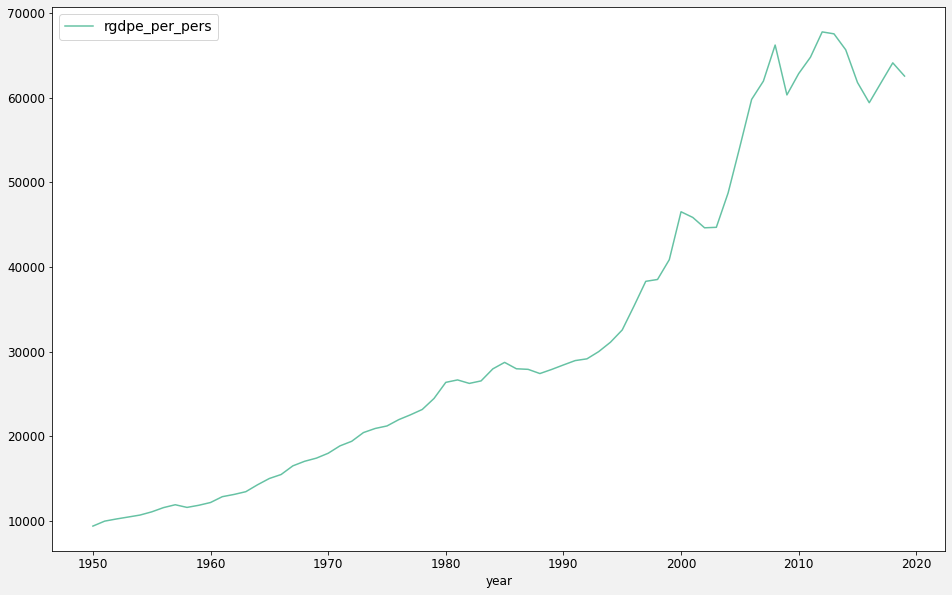

In [30]:
NorwayData.plot(x="year", y="rgdpe_per_pers")

Here we see that the plot function appears as an attribute of the Pandas data frame object (NorwayData), and we can specify the columns we want to represent the x-axis ("year") and y-axis ("rgdpe_per_pers")

We could also display the data as a barchart

<AxesSubplot:xlabel='year'>

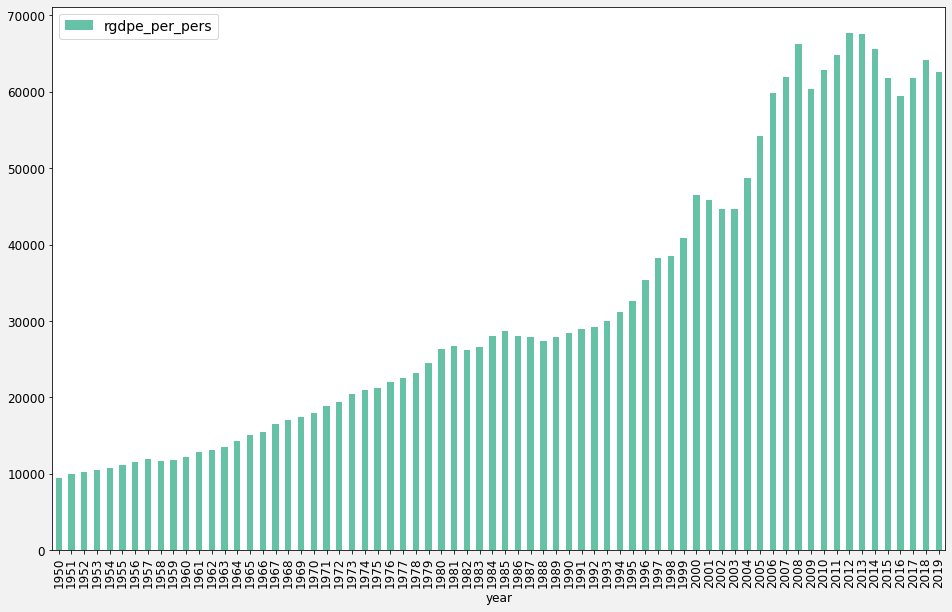

In [31]:
NorwayData.plot(x="year", y="rgdpe_per_pers", kind="bar")

Looking at the individual real GDP series, we see a steady growth through the 1960s and 1970s, but no distinct change after oil was found in 1969. There was a slow-down in the late 1980's into the early 1990's. This was a period with low oil prices and a financial crisis in Norway and other scandinavian countries. Real GDP per person (expenditure) seems to increase markedly in the late 1990's and through 2008, after which there is some stagnation. 

You can read more about the built-in visualisation functions in the [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

But I want to get data for Norway, Denmark and Sweden, then I will use the isin() function:

In [32]:
scanCountries = ["Norway", "Sweden", "Denmark"]

scanData = pwt.loc[pwt.country.isin(scanCountries),["country", "year", "rgdpe_per_pers"]]
scanData

,country,year,rgdpe_per_pers
3430,Denmark,1950,10516.366507
3431,Denmark,1951,10030.613846
3432,Denmark,1952,10336.704677
3433,Denmark,1953,10984.613037
3434,Denmark,1954,11296.978051
...,...,...,...
10845,Sweden,2015,52431.745682
10846,Sweden,2016,53319.292829
10847,Sweden,2017,54981.666390
10848,Sweden,2018,55389.802809


Now we have the data we want

## Simple plotting with Pandas

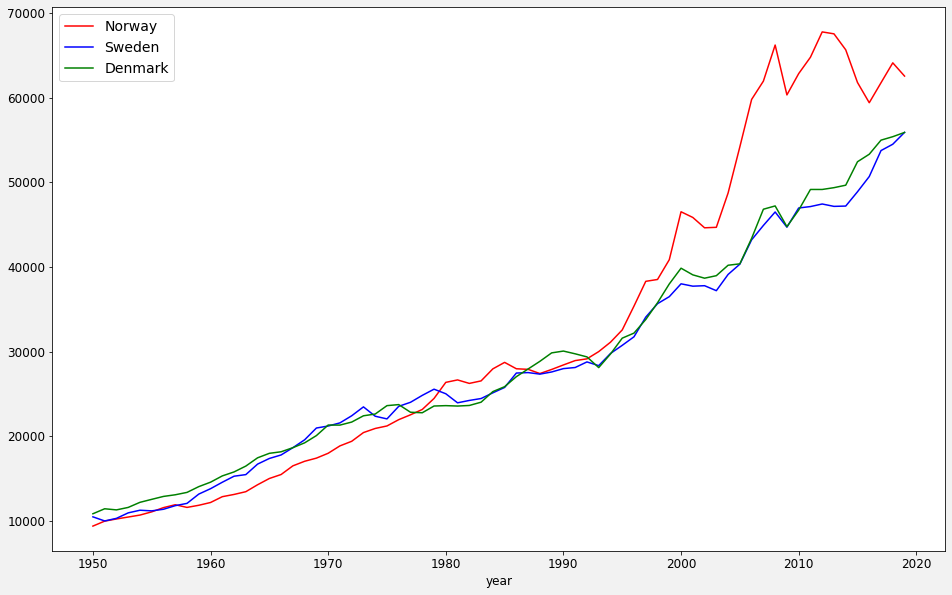

In [33]:
fig, ax = plt.subplots()
scanData.loc[scanData.country=="Norway"].plot(x="year", y="rgdpe_per_pers", color="red", ax=ax, label="Norway")
scanData.loc[scanData.country=="Denmark"].plot(x="year", y="rgdpe_per_pers", color="blue", ax=ax, label="Sweden")
scanData.loc[scanData.country=="Sweden"].plot(x="year", y="rgdpe_per_pers", color="Green", ax=ax, label="Denmark")
plt.show()


A common transformation for long economic time series data is to log the series. We will spend more time on explaining log-transformations, but for now, it suffices to say that transforming a long series that shows growth can tell us something about the rate-of-growth of the series over time. Let's try doing a log-transformation with the np.log() function

In [35]:
scanData["log_rgdpe_per_pers"] = np.log(scanData.rgdpe_per_pers)

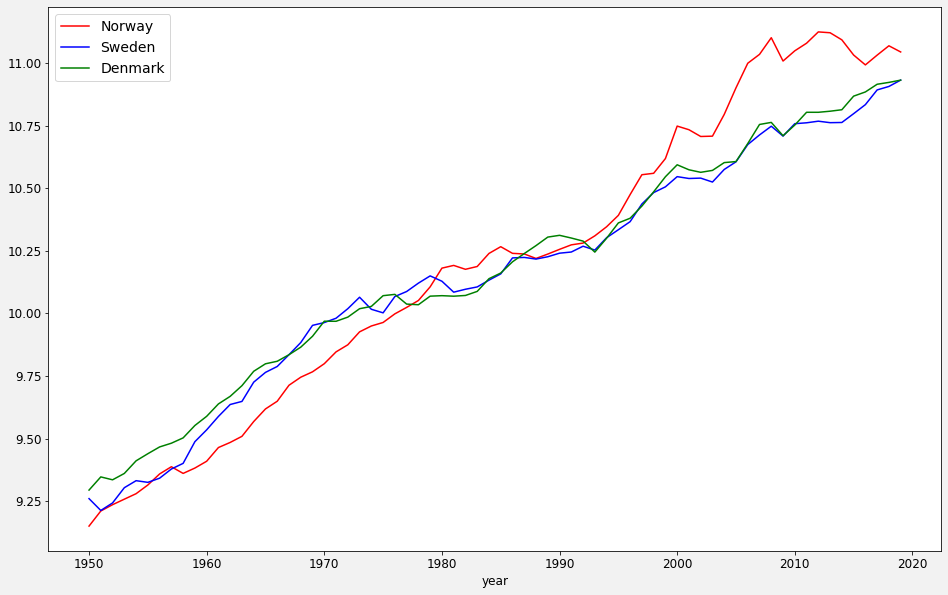

In [37]:
fig, ax = plt.subplots()
scanData.loc[scanData.country=="Norway"].plot(x="year", y="log_rgdpe_per_pers", color="red", ax=ax, label="Norway")
scanData.loc[scanData.country=="Denmark"].plot(x="year", y="log_rgdpe_per_pers", color="blue", ax=ax, label="Sweden")
scanData.loc[scanData.country=="Sweden"].plot(x="year", y="log_rgdpe_per_pers", color="Green", ax=ax, label="Denmark")
plt.show()

With the log transformation we can see trends in rate-of-change/growth more easily. We might seem to notice that while the slope of the lines for Denmark and Sweden follow each closely from about the mid-90s to mid-2000s, the growth rate in Norway has been considerably stronger in this period. 



# Assignment

### 1. In the lab we looked at real GDP expenditure. Now do an analysis with output-side real GDP. 

Roughly, expenditure-side GDP measures the consumption of an economy, while the output-side GDP measures the productive capacity of an economy. In most situations these two sides should be roughly similar, but they can and do diverge.

* Create a new variable called "rgdpo_per_pers" which divides output-side real gdp ("rdgpo") by population ("pop"). 

* Extract a dataframe with Norwegian, Swedish and Danish data and create a chart of the rgdpo_per_pers comparing the three countries.  

* Also do a log transformation and plot. 

* How does this measure of GDP differ from the one above? Can you explain why?

### 2. Creating fake data. 

You might think that statisticians would frown upon faking data (and indeed, in certain contexts they do), but it can be a useful tool in understanding models - also in this course. In this exercise you are going to create your own fake data set. 

* We have a relationship we wish to model which we think has the following form: 

$$y_i = \beta_1*x_{1i} + \beta_2*x_{2i} + e_i$$

Perhaps $y_i$ is the test score on a standardized exam which is a linear function of how much a student, i, studies,  $x_{1i}$, and how high their IQ is, $x_{2i}$, plus some random component $e_i$. 

* Generate NP arrays for $x_{1i}$ and $x_{2i}$. Generate data for N=1000 students, assuming that both $x_{1i}$ and $x_{2i}$ come from uniform distribution (see lab 1) between 0 and 1. 

* Generate the series $e_i$ which is from a standard normal distribution - mean 0, standard deviation 1. 

* Generate y_i series by letting $\beta_1 = 0.5$ and $\beta_2 = -0.2$ and computing based on the formula above.

* Create a Pandas data frame with the 4 NP arrays you have created (See [here](https://jakevdp.github.io/PythonDataScienceHandbook/03.01-introducing-pandas-objects.html)).

* Use the Pandas function: [pandas.DataFrame.corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) to generate correlation coefficients between your variables. How do these estimates compare to the $\beta_1$ and $\beta_2$ values you chose

### 3. Open-ended assignment: 

Find an interesting data set or series, and load it in as as a Pandas data frame or series. Do some initial transformations or cleaning if necessary. Plot the series or multiple series. Try to explain some of the patterns you see. 

You can and should see this as the first step of starting your course project. 

# References

- Feenstra, Robert C., Robert Inklaar and Marcel P. Timmer (2015), "The Next Generation of the Penn World Table" American Economic Review, 105(10), 3150-3182, available for download at www.ggdc.net/pwt